In [ ]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from lightgbm.sklearn import LGBMRanker
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ratings.csv')
display(df[0:3])
n=len(df)
print(n)
N=list(range(n))
random.seed(2024)
random.shuffle(N)
df=df.iloc[N[0:3000]]

,userId,movieId,rating,timestamp
0,1,296.0,5.0,1.147880e+09
1,1,306.0,3.5,1.147869e+09
2,1,307.0,5.0,1.147869e+09


85378


In [ ]:
movie=pd.read_csv('movies.csv')
display(movie[0:3])
print(movie.columns.tolist())

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


['movieId', 'title', 'genres']


In [ ]:
mapping = dict(zip(movie['movieId'], movie['title']))

In [ ]:
df=df.merge(movie,on='movieId',how='left')
display(df)

,userId,movieId,rating,timestamp,title,genres
0,226,5346.0,2.0,1.059517e+09,Wild Orchid (1990),Drama|Romance
1,345,610.0,2.0,9.850568e+08,Heavy Metal (1981),Action|Adventure|Animation|Horror|Sci-Fi
2,247,1416.0,2.0,1.005957e+09,Evita (1996),Drama|Musical
3,120,3499.0,5.0,9.638833e+08,Misery (1990),Drama|Horror|Thriller
4,186,3751.0,4.0,1.192555e+09,Chicken Run (2000),Animation|Children|Comedy
...,...,...,...,...,...,...
2995,350,1207.0,4.0,1.049870e+09,To Kill a Mockingbird (1962),Drama
2996,431,4214.0,2.5,1.111672e+09,Revenge of the Nerds (1984),Comedy
2997,174,1240.0,4.5,1.553405e+09,"Terminator, The (1984)",Action|Sci-Fi|Thriller
2998,322,1833.0,4.0,9.875525e+08,Mercury Rising (1998),Action|Drama|Thriller


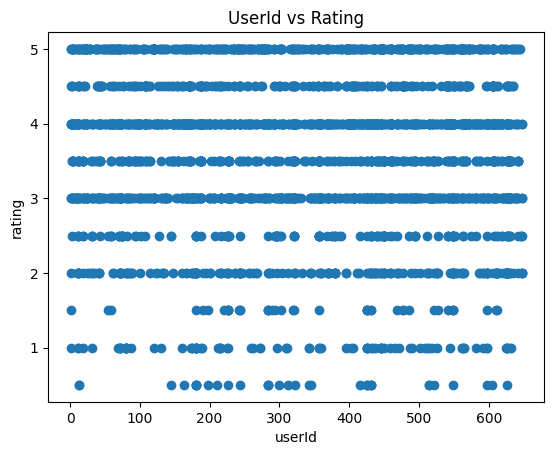

In [ ]:
plt.scatter(df['userId'], df['rating'])
plt.xlabel('userId')
plt.ylabel('rating')
plt.title('UserId vs Rating')
plt.show()

In [ ]:
df['movieId'].value_counts()

1196.0     14
592.0      13
1210.0     11
480.0      11
527.0      10
           ..
55282.0     1
74228.0     1
1610.0      1
89774.0     1
1833.0      1
Name: movieId, Length: 1714, dtype: int64

In [ ]:
print(df['rating'].unique().tolist())
print(df['userId'].nunique())
print(df['movieId'].nunique())

[2.0, 5.0, 4.0, 4.5, 3.5, 1.5, 3.0, 2.5, 1.0, 0.5]
549
1714


In [ ]:
print(df.columns.tolist())

['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres']


In [ ]:
feature_cols=['userId', 'movieId']
target= 'rating'
group_col='userId'

In [ ]:
dataX=df[feature_cols]
dataY=df[target]

In [ ]:
dataY=(dataY*2).astype(int)

In [ ]:
trainX, testX, trainY, testY = train_test_split(dataX, dataY, test_size=0.1, random_state=42)

In [ ]:
display(trainX)

,userId,movieId
433,196,4993.0
1151,258,317.0
73,104,1036.0
1536,468,1242.0
2709,570,1409.0
...,...,...
1638,566,8651.0
1095,95,89774.0
1130,181,135536.0
1294,378,1527.0


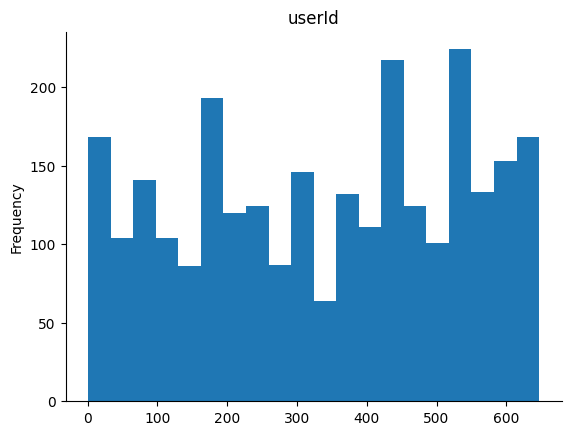

In [ ]:
# @title userId

from matplotlib import pyplot as plt
trainX['userId'].plot(kind='hist', bins=20, title='userId')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
display(testX)

,userId,movieId
1801,426,3752.0
1190,318,45726.0
1817,227,231.0
251,86,1136.0
2505,626,7151.0
...,...,...
2497,98,101415.0
787,13,48774.0
2636,459,344.0
2538,489,5445.0


In [ ]:
print(testX.head())

      userId  movieId
1801     426   3752.0
1190     318  45726.0
1817     227    231.0
251       86   1136.0
2505     626   7151.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     3000 non-null   int64  
 1   movieId    3000 non-null   float64
 2   rating     3000 non-null   float64
 3   timestamp  3000 non-null   float64
 4   title      2977 non-null   object 
 5   genres     2977 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 164.1+ KB


In [ ]:
test_movie=testX['userId'].value_counts()[0:9].index.tolist()
test_user=testX['userId'].value_counts()[0:9].index.tolist()
print(test_movie)
print(test_user)

[548, 626, 426, 628, 494, 321, 166, 84, 357]
[548, 626, 426, 628, 494, 321, 166, 84, 357]


In [ ]:
data=[]
for a in test_movie:
    for u in test_user:
        data+=[[a,u]]

TESTX=pd.DataFrame(data=data,columns=['movieId','userId'])
display(TESTX)

,movieId,userId
0,548,548
1,548,626
2,548,426
3,548,628
4,548,494
...,...,...
76,357,494
77,357,321
78,357,166
79,357,84


In [ ]:
ranker = LGBMRanker(
    objective="lambdarank",
    metric="ndcg",
    boosting_type="dart",
    n_estimators=6,
    importance_type='gain',
)

ranker

LGBMRanker(boosting_type='dart', importance_type='gain', metric='ndcg',
           n_estimators=6, objective='lambdarank')

In [ ]:
def get_session_lengths(df, group_col):
    return df.groupby(group_col).size().reset_index(name='session_length')

session_lengths_train = get_session_lengths(trainX,group_col)
session_lengths_train[0:5]

,userId,session_length
0,1,1
1,2,8
2,3,18
3,4,8
4,5,6


In [ ]:
import numpy as np

In [ ]:
ranker.fit(
    trainX,
    trainY,
    group=np.array(session_lengths_train['session_length'])
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 502
[LightGBM] [Info] Number of data points in the train set: 2700, number of used features: 2


LGBMRanker(boosting_type='dart', importance_type='gain', metric='ndcg',
           n_estimators=6, objective='lambdarank')

In [ ]:
scores = ranker.predict(TESTX)
scores[0:5]

array([-0.35512026, -0.32126418, -0.29811791, -0.32126418, -0.35512026])

In [ ]:
result=pd.concat([TESTX,pd.DataFrame(data=scores,columns=['score'])],axis=1)
display(result)

,movieId,userId,score
0,548,548,-0.355120
1,548,626,-0.321264
2,548,426,-0.298118
3,548,628,-0.321264
4,548,494,-0.355120
...,...,...,...
76,357,494,-0.197586
77,357,321,-0.085554
78,357,166,-0.218151
79,357,84,-0.273190


In [ ]:
for idi in test_movie[0:3]:#selected anime
    dfi=result[result['movieId']==idi]

    dfi=dfi.sort_values('score',ascending=False)
    dfi['title']=dfi['movieId'].map(mapping)
    display(dfi)

,movieId,userId,score,title
5,548,321,0.031832,Terminal Velocity (1994)
8,548,357,0.031832,Terminal Velocity (1994)
2,548,426,-0.298118,Terminal Velocity (1994)
6,548,166,-0.312106,Terminal Velocity (1994)
1,548,626,-0.321264,Terminal Velocity (1994)
3,548,628,-0.321264,Terminal Velocity (1994)
0,548,548,-0.355120,Terminal Velocity (1994)
4,548,494,-0.355120,Terminal Velocity (1994)
7,548,84,-0.367146,Terminal Velocity (1994)


,movieId,userId,score,title
14,626,321,-0.078790,"Thin Line Between Love and Hate, A (1996)"
17,626,357,-0.078790,"Thin Line Between Love and Hate, A (1996)"
15,626,166,-0.190601,"Thin Line Between Love and Hate, A (1996)"
16,626,84,-0.190601,"Thin Line Between Love and Hate, A (1996)"
11,626,426,-0.386920,"Thin Line Between Love and Hate, A (1996)"
13,626,494,-0.386920,"Thin Line Between Love and Hate, A (1996)"
9,626,548,-0.513458,"Thin Line Between Love and Hate, A (1996)"
10,626,626,-0.636637,"Thin Line Between Love and Hate, A (1996)"
12,626,628,-0.636637,"Thin Line Between Love and Hate, A (1996)"


,movieId,userId,score,title
23,426,321,0.024104,Body Snatchers (1993)
26,426,357,0.024104,Body Snatchers (1993)
20,426,426,-0.209237,Body Snatchers (1993)
24,426,166,-0.223225,Body Snatchers (1993)
19,426,626,-0.232383,Body Snatchers (1993)
21,426,628,-0.232383,Body Snatchers (1993)
18,426,548,-0.266239,Body Snatchers (1993)
22,426,494,-0.266239,Body Snatchers (1993)
25,426,84,-0.278265,Body Snatchers (1993)


In [ ]:
for idi in test_user[0:3]:#selected user
    dfi=result[result['userId']==idi]

    dfi=dfi.sort_values('score',ascending=False)
    dfi['title']=dfi['movieId'].map(mapping)
    display(dfi)


,movieId,userId,score,title
54,166,548,0.021316,"Doom Generation, The (1995)"
63,84,548,0.021316,Last Summer in the Hamptons (1995)
45,321,548,-0.197586,Strawberry and Chocolate (Fresa y chocolate) (...
72,357,548,-0.197586,Four Weddings and a Funeral (1994)
18,426,548,-0.266239,Body Snatchers (1993)
36,494,548,-0.283400,Executive Decision (1996)
0,548,548,-0.355120,Terminal Velocity (1994)
9,626,548,-0.513458,"Thin Line Between Love and Hate, A (1996)"
27,628,548,-0.513458,Primal Fear (1996)


,movieId,userId,score,title
55,166,626,-0.178327,"Doom Generation, The (1995)"
64,84,626,-0.178327,Last Summer in the Hamptons (1995)
19,426,626,-0.232383,Body Snatchers (1993)
37,494,626,-0.249544,Executive Decision (1996)
46,321,626,-0.320764,Strawberry and Chocolate (Fresa y chocolate) (...
73,357,626,-0.320764,Four Weddings and a Funeral (1994)
1,548,626,-0.321264,Terminal Velocity (1994)
10,626,626,-0.636637,"Thin Line Between Love and Hate, A (1996)"
28,628,626,-0.636637,Primal Fear (1996)


,movieId,userId,score,title
56,166,426,-0.080635,"Doom Generation, The (1995)"
65,84,426,-0.080635,Last Summer in the Hamptons (1995)
47,321,426,-0.140584,Strawberry and Chocolate (Fresa y chocolate) (...
74,357,426,-0.140584,Four Weddings and a Funeral (1994)
20,426,426,-0.209237,Body Snatchers (1993)
38,494,426,-0.226398,Executive Decision (1996)
2,548,426,-0.298118,Terminal Velocity (1994)
11,626,426,-0.386920,"Thin Line Between Love and Hate, A (1996)"
29,628,426,-0.386920,Primal Fear (1996)
